# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Assigment Approach

### Section 1: Data understanding, Preparation & EDA  - 
This includes reading, understanding, Visualizing data & creating dummy variables.

### Section 2: Model Building 
This section includes steps for splitting data into traiing & test dataset, Scaling and normalizing data, fitting model, Checking VIFs and feature selection via RFE.

### Section 3: Model Evaluation
This section includes steps for residual analysis of data, prediction and model evaluation.

## Import required libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

# Importing Minmax scaler
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')


# Section 1: Data Preparation


## section 1.1 Reading, understanding and cleaning the data

In [2]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the rows & Columns
day.shape

(730, 16)

In [4]:
# Describe the numerical variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Check the Null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the uniue values
day.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [7]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Drop the unnecessary variables 

day=day.drop(['instant','dteday','casual','registered'],axis=1)


In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Section 1.2 Visualize the data

<AxesSubplot:xlabel='yr', ylabel='cnt'>

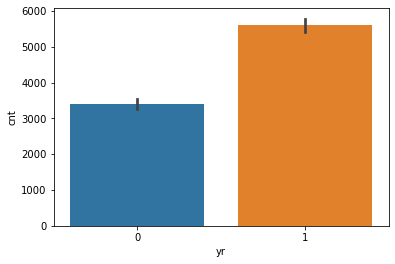

In [11]:
# Check the growth in user in year 2019 compared to 2018. 
sns.barplot(x = 'yr', y = 'cnt', data = day)


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

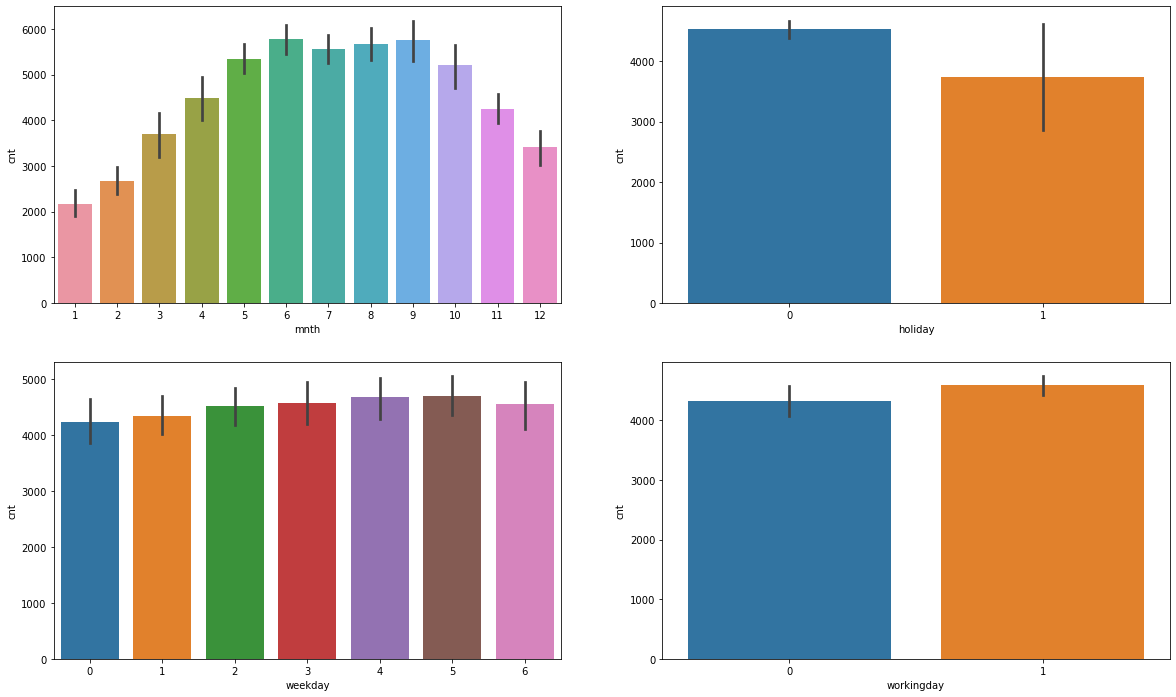

In [12]:
# See the barplot for categorical variables which are related to Days to see any relation of CNT with specific day
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.barplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.barplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.barplot(x = 'workingday', y = 'cnt', data = day)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

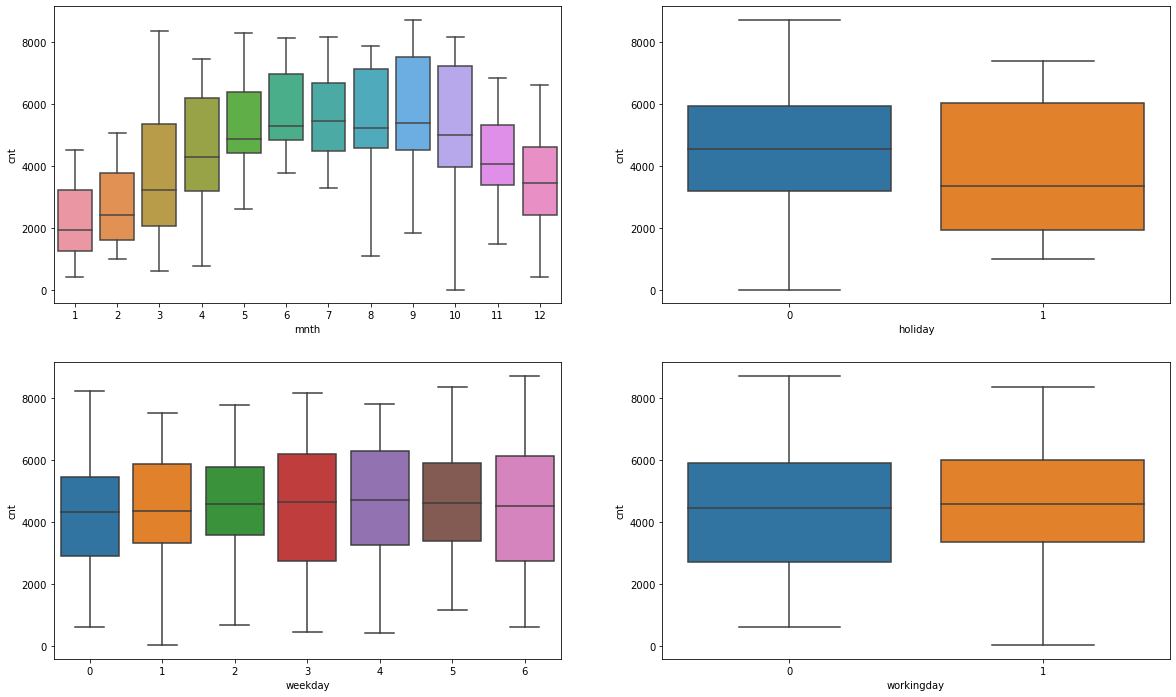

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

<Figure size 1440x864 with 0 Axes>

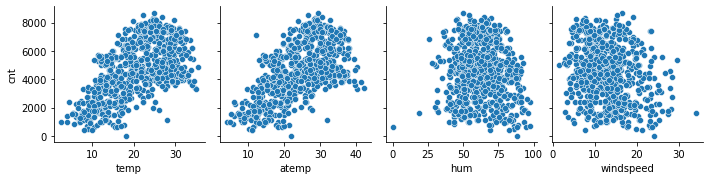

In [14]:
# See the pairplot for numeric continuous variables to see if CNT has relation to specific weather condition
plt.figure(figsize=(20, 12))
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',data=day)
plt.show()

<AxesSubplot:ylabel='windspeed'>

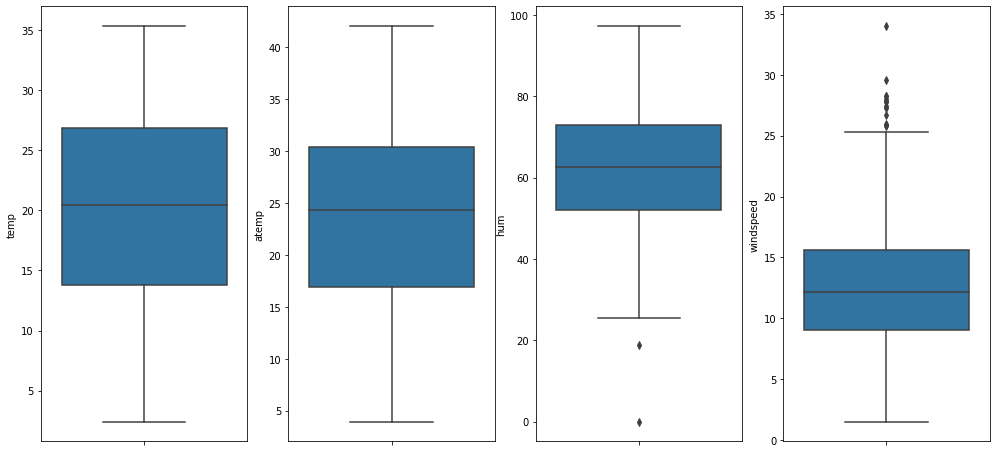

In [15]:
plt.figure(figsize=(17, 8))
plt.subplot(1,4,1)
sns.boxplot(y=day['temp'])
plt.subplot(1,4,2)
sns.boxplot(y=day['atemp'])
plt.subplot(1,4,3)
sns.boxplot(y=day['hum'])
plt.subplot(1,4,4)
sns.boxplot(y=day['windspeed'])


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

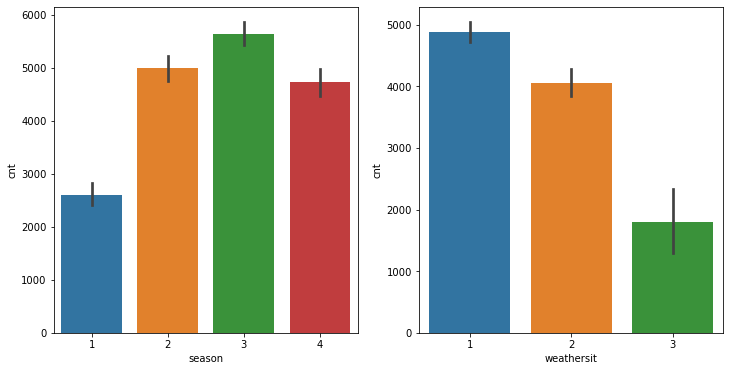

In [16]:
# See the barplot for categorical data for weather to see if any relation with CNT variables
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'cnt', data = day)
plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = day)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

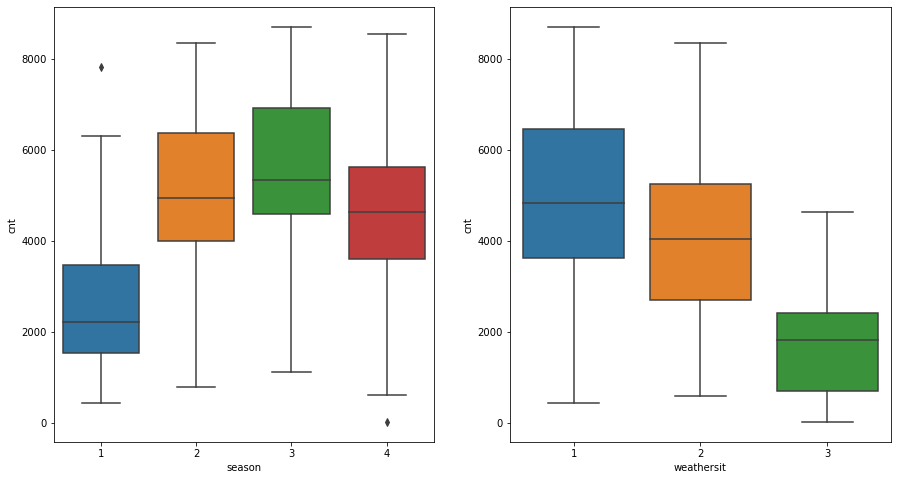

In [17]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(1,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

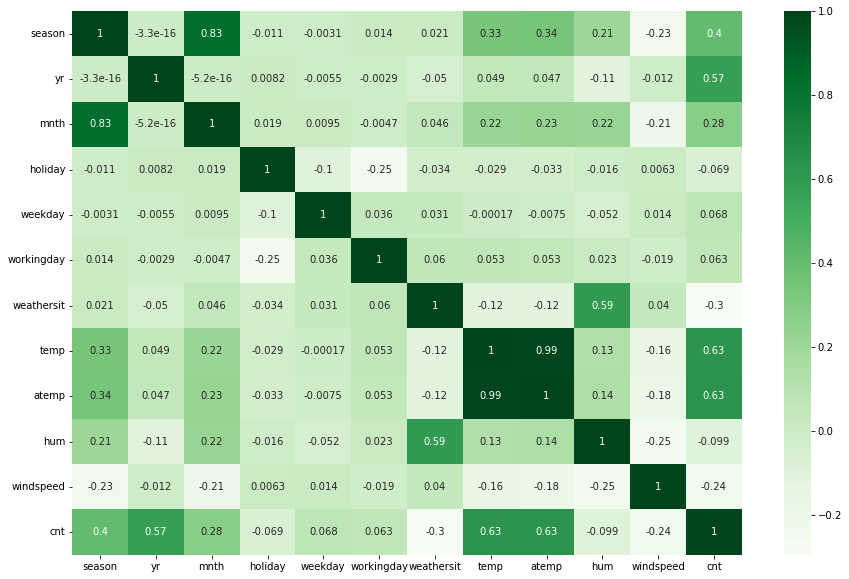

In [18]:
## Check the correlation matrix to find out which variables have high correlation with target variable CNT.
corr = day.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

## Section 1.3 : Creating dummy variables with One hot Encoding

In [19]:
# Create dummy variables for season
season_dummy = pd.get_dummies(day['season'],drop_first = True)
season_dummy.columns=['summer','fall','winter']
season_dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [20]:
# Create dummy variables for weather
weather_dummy = pd.get_dummies(day['weathersit'])
weather_dummy.columns = ['clearsky','misty','lightrain']
weather_dummy.head()

# Note - the fourth cateogry i.e. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, it does NOT have any rows 
# in dataset. So I will NOT use drop_first as we are already one category short.

,clearsky,misty,lightrain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# Create dummy variables for weekday
weekday_dummy = pd.get_dummies(day['weekday'],drop_first = True)
weekday_dummy.columns = ['tuesday','wednesday','thursday','friday','saturday','sunday']
weekday_dummy.head()

,tuesday,wednesday,thursday,friday,saturday,sunday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [22]:
# Create dummy variables for month
mnth_dummy= pd.get_dummies(day['mnth'],drop_first = True)
mnth_dummy.columns = ['feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
mnth_dummy.tail()

,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1
729,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# concat the dummy variables dataframes with main dataframe and drop the original columns
day = pd.concat([day, season_dummy,weather_dummy,weekday_dummy,mnth_dummy], axis = 1)
day=day.drop(['season','weathersit','weekday','mnth'],axis=1)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
day.shape

(730, 31)

In [25]:
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'clearsky', 'misty', 'lightrain',
       'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday',
       'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov',
       'dec'],
      dtype='object')

# Section 2: Model Creation

## Section 2.1 : Split the data into training and test data, & Scale the data.

In [26]:
# Split the dataset into Test & training dataset.
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# Perform scaling on Numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## Section 2.2 Building our model
We will be using the Linear Regression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [29]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,step=1)
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('clearsky', True, 1),
 ('misty', True, 1),
 ('lightrain', True, 1),
 ('tuesday', False, 12),
 ('wednesday', False, 13),
 ('thursday', False, 15),
 ('friday', False, 16),
 ('saturday', False, 14),
 ('sunday', True, 1),
 ('feb', False, 8),
 ('mar', False, 3),
 ('apr', False, 5),
 ('may', False, 4),
 ('jun', False, 6),
 ('jul', False, 9),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', True, 1),
 ('nov', False, 10),
 ('dec', False, 11)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'clearsky', 'misty', 'lightrain', 'sunday', 'aug', 'sept',
       'oct'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['atemp', 'fall', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'nov', 'dec'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [35]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [36]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.24e-192
Time:                        00:00:54   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0692      0.025      2.731      0.0

In [37]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'clearsky', 'misty', 'lightrain', 'sunday', 'aug',
       'sept', 'oct'],
      dtype='object')

In [38]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,clearsky,33.55
9,misty,25.02
10,lightrain,3.69
2,workingday,1.88
4,hum,1.88
11,sunday,1.79
7,winter,1.72
3,temp,1.59
14,oct,1.49
12,aug,1.46


### Since clearsky has very high VIF, lets drop it first

In [40]:
X_train_new = X_train_rfe.drop(['clearsky'], axis=1)

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.24e-192
Time:                        00:00:54   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.029      6.770      0.0

In [42]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,winter,2.27
8,misty,2.14
0,yr,2.03
10,sunday,1.90
6,summer,1.83
13,oct,1.62


### Humidity has now high VIF, lets drop it now.

In [43]:
X_train_new = X_train_new.drop(['hum'], axis=1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.16e-189
Time:                        00:00:55   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.019      4.961      0.0

In [44]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,winter,2.02
5,summer,1.82
9,sunday,1.77
12,oct,1.62
10,aug,1.59
7,misty,1.54


### Based on above VIFs, it appears that they are now within acceptable limit. Hence we will procees further with model creation with these variables.

In [45]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'misty', 'lightrain', 'sunday', 'aug', 'sept', 'oct'],
      dtype='object')

## Section 2.3 : Residual Analysis of the train data

In [46]:
y_train_cnt = lm.predict(X_train_lm)

In [47]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

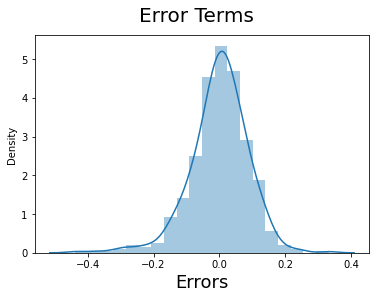

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## checking pattern in residue

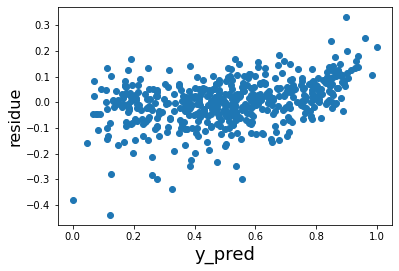

In [49]:
#res = y_train - y_train_cnt
res = y_train - y_train_cnt
plt.scatter(y_train,res)
fig.suptitle('y_pred vs residue', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('residue', fontsize=16) 
plt.show()

# Section 3: Making prediction & Model evaluation
##  Sectopm 3.1 " Applying the scaling on the test sets

In [50]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [51]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,1,0,0,0,0,0,0


### Dividing into X_test and y_test

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

### Now let's use our model to make predictions.

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
X_train_new.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'winter',
       'misty', 'lightrain', 'sunday', 'aug', 'sept', 'oct'],
      dtype='object')

### Making predictions

In [55]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

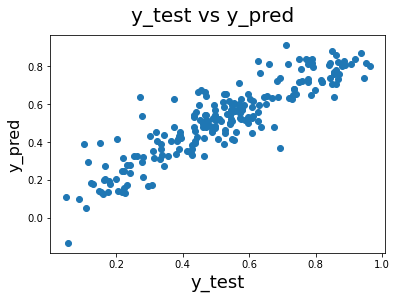

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## Check for pattern in residue.

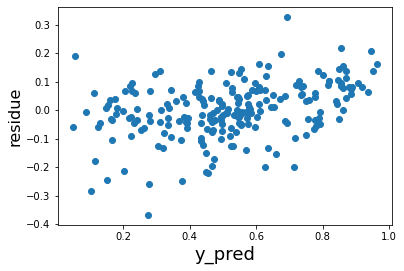

In [57]:
res = y_test - y_pred
plt.scatter(y_test,res)
fig.suptitle('y_pred vs residue', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('residue', fontsize=16) 
plt.show()


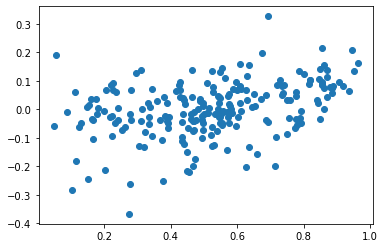

In [58]:
plt.scatter(y_test,res)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8026410728126752

## R-squared score : 0.8026410728126752